<a href="https://colab.research.google.com/github/carson-edmonds/AAI-590_Group-3_Capstone/blob/main/AOT_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align:center">Airborne Object Tracking - Exploratory Data Analysis</h1>

####Accessing the dataset involved the following code that was referenced in the AOT challenge website: https://www.aicrowd.com/challenges/airborne-object-tracking-challenge and with the tutorial code created by Vuong Tuan Khanh at: https://github.com/VuongTuanKhanh/Airborne-Object-Detection-and-Tracking

# Imports

In [ ]:
import json
import random
import os, sys
from IPython.display import display, clear_output, HTML
from random import randrange, choice
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=25,25
import numpy as np
import seaborn as sns

random.seed(42)

def mdprint(text):
    display({
        'text/markdown': text,
        'text/plain': text
    }, raw=True)

!git clone https://github.com/VuongTuanKhanh/Funix-Capstone-Project.git

os.mkdir("Funix-Capstone-Project/data")
os.chdir("Funix-Capstone-Project/data")

Cloning into 'Funix-Capstone-Project'...
remote: Enumerating objects: 528, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 528 (delta 2), reused 2 (delta 0), pack-reused 519
Receiving objects: 100% (528/528), 406.22 MiB | 24.83 MiB/s, done.
Resolving deltas: 100% (167/167), done.
Updating files: 100% (172/172), done.


## Loading Dataset:



In [ ]:
# Dataset for Airborne Object Tracking
sys.path.append(os.path.dirname(os.path.realpath(os.getcwd())))
sys.path.append(os.path.dirname(os.path.realpath(os.getcwd())) + "/core")

!pip install -r ../requirements.txt > /dev/null

from core.dataset import Dataset
notebook_path = os.path.dirname(os.path.realpath("__file__"))

local_path = notebook_path + '/part1'
s3_path = 's3://airborne-obj-detection-challenge-training/part1/'
dataset = Dataset(local_path, s3_path, partial=True, prefix='part1')
clear_output()

In [ ]:
from core.dataset import Dataset

# Dataset is automatically downloaded to this folder
notebook_path = os.path.dirname(os.path.realpath("__file__")) + '/data'
# Location to look for images in case they aren't present locally
s3_path = 's3://airborne-obj-detection-challenge-training'

# Generate the constructer of the Dataset instance
dataset = Dataset(partial=True)

# Add parts to the Dataset
for prefix in ['/part1', '/part2', '/part3']:
    path = notebook_path + prefix
    # Append the second part of the dataset
    dataset.add(path, s3_path + prefix, prefix)

# Clear the output
clear_output()

In [ ]:
# Check whether efs-data folder is existed and not empty
# Install the nfs tree
!apt install nfs-common tree

if not os.path.exists("./efs-data"):
    # Create the directory
    os.mkdir("efs-data")

# Mounting the data to the created directory
!sudo mount -t nfs -o nfsvers=4.1,rsize=1048576,wsize=1048576,hard,timeo=600,retrans=2 airborne-object-tracking-dataset.aicrowd.com:/ efs-data/
# Print out the structure of the downloaded folder
!tree -L 3 efs-data/

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  keyutils libnfsidmap1 libwrap0 rpcbind
Suggested packages:
  open-iscsi watchdog
The following NEW packages will be installed:
  keyutils libnfsidmap1 libwrap0 nfs-common rpcbind tree
0 upgraded, 6 newly installed, 0 to remove and 45 not upgraded.
Need to get 477 kB of archives.
After this operation, 1,674 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libnfsidmap1 amd64 1:2.6.1-1ubuntu1.2 [42.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libwrap0 amd64 7.6.q-31build2 [47.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 rpcbind amd64 1.2.6-2build1 [46.6 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 keyutils amd64 1.6.1-2ubuntu3 [50.4 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 nfs-common amd64 1:2.6.1-1ubuntu1.2 

##Verifying data has been loaded:



In [ ]:
all_flight_ids = dataset.get_flight_ids()
flight_id = random.choice(all_flight_ids)
flight = dataset.get_flight_by_id(flight_id)

2024-08-11 13:42:23.184 | INFO     | core.file_handler:download_file_if_needed:33 - [download_from_s3] File not found locally, downloading: Images/d1dc3ab1b29143ffbcc6ce189e26cbdd/1566551098641087101d1dc3ab1b29143ffbcc6ce189e26cbdd.png
2024-08-11 13:42:23.934 | INFO     | core.file_handler:download_file_if_needed:33 - [download_from_s3] File not found locally, downloading: Images/d1dc3ab1b29143ffbcc6ce189e26cbdd/1566551105518652171d1dc3ab1b29143ffbcc6ce189e26cbdd.png
2024-08-11 13:42:25.202 | INFO     | core.file_handler:download_file_if_needed:33 - [download_from_s3] File not found locally, downloading: Images/d1dc3ab1b29143ffbcc6ce189e26cbdd/1566551124806610224d1dc3ab1b29143ffbcc6ce189e26cbdd.png
2024-08-11 13:42:26.433 | INFO     | core.file_handler:download_file_if_needed:33 - [download_from_s3] File not found locally, downloading: Images/d1dc3ab1b29143ffbcc6ce189e26cbdd/1566551154488370913d1dc3ab1b29143ffbcc6ce189e26cbdd.png
2024-08-11 13:42:28.251 | INFO     | core.file_handler:d

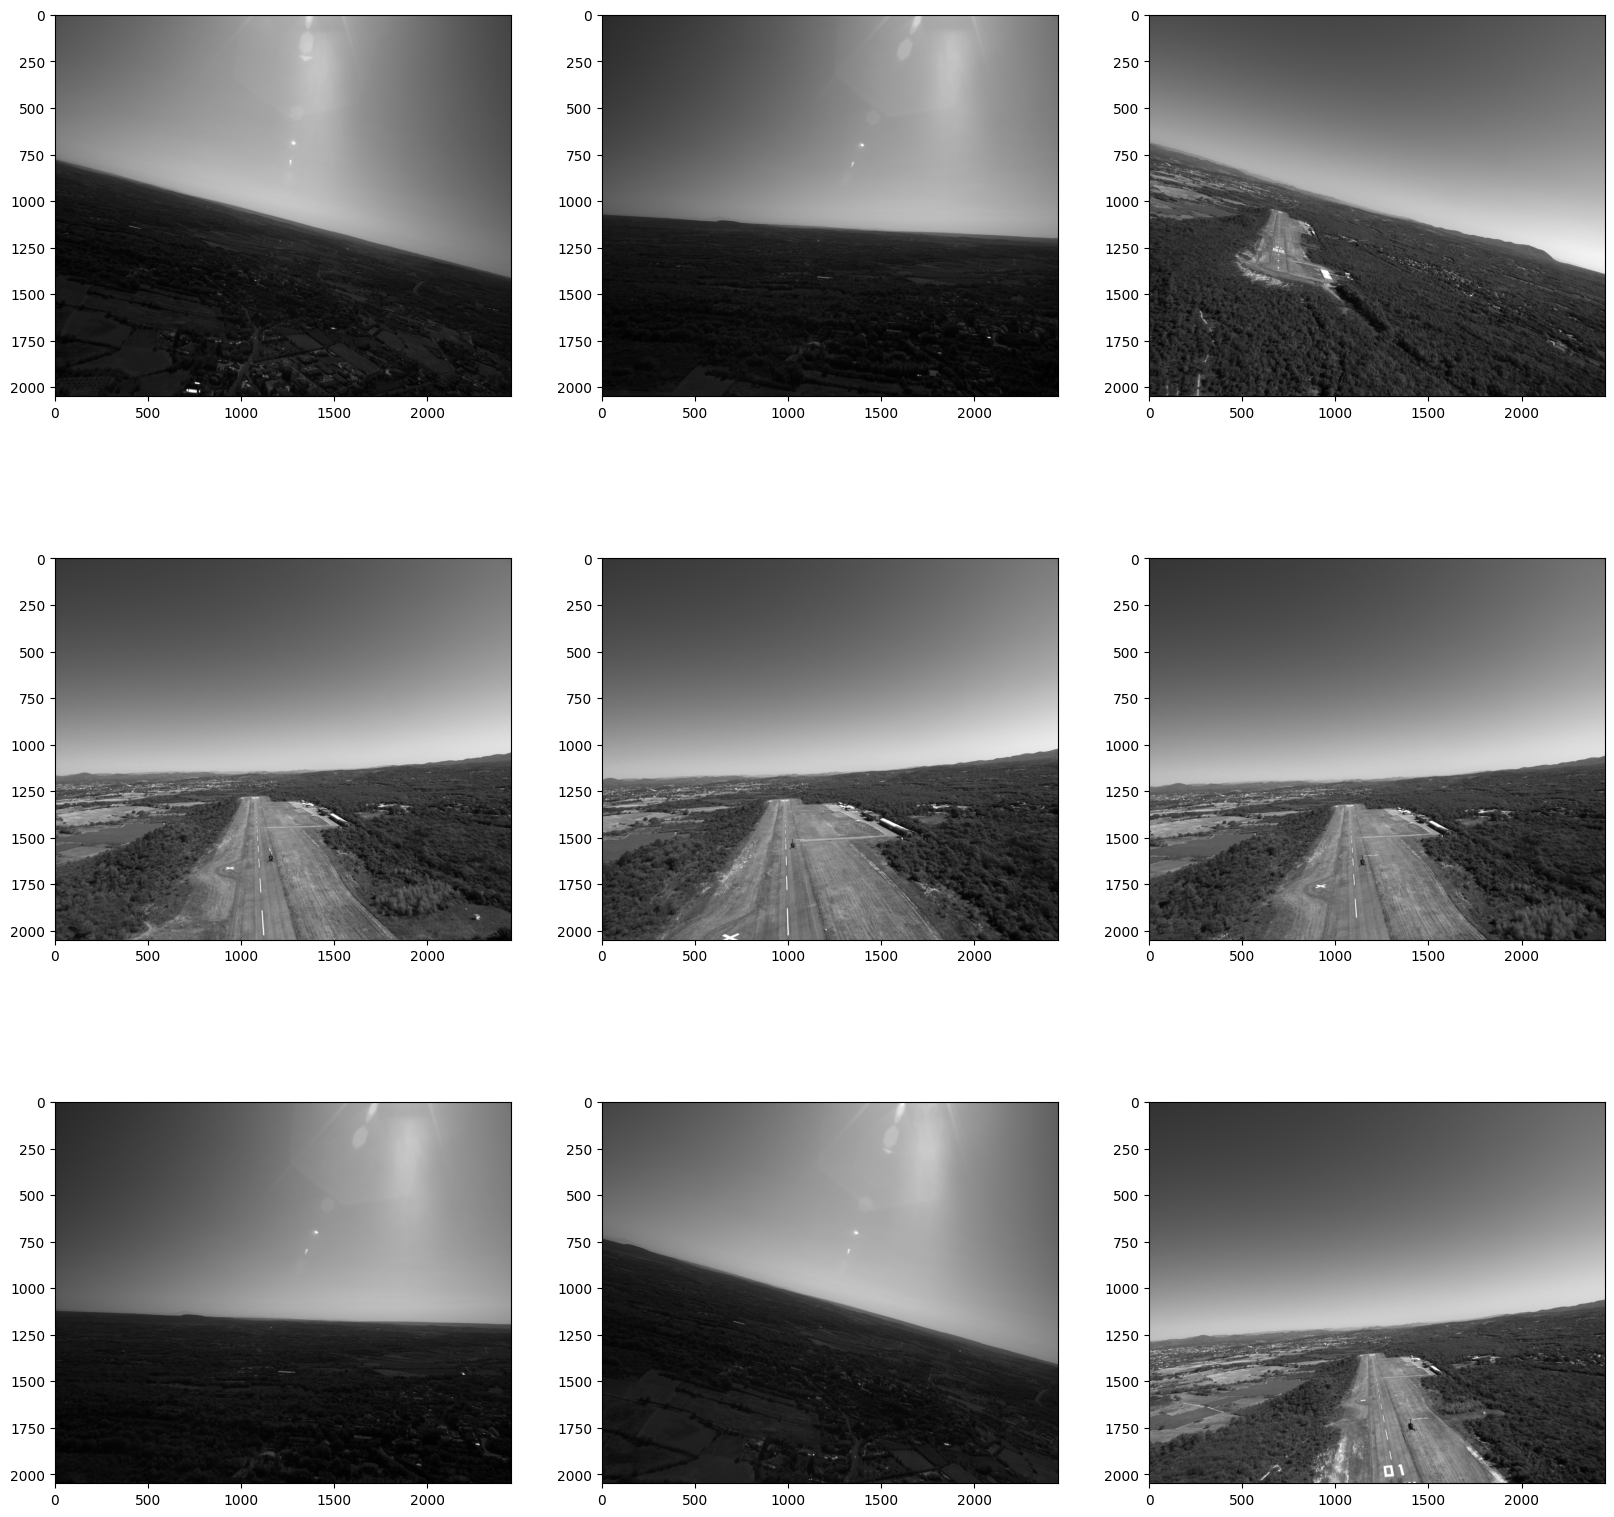

In [ ]:
plt.rcParams["figure.figsize"]=20,20
fig = plt.figure()

for i in range(1, 10):
    ax = fig.add_subplot(3, 3, i)
    ax.imshow(flight.get_frame(choice(list(flight.frames.keys()))).image(type='cv2'))

plt.show()

In [ ]:
flight_path = flight.generate_video(speed_x=1)

# For rendering on Colab
from base64 import b64encode
mp4 = open(flight_path, 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

2024-08-11 13:42:39.429 | INFO     | core.flight:generate_video:129 - Generating video...


##Moving on to Data Cleaning and EDA:

In [9]:
# Here we are loading data to convert it to dataframe
from core.helper import *

# Initialize the enviroment
initialize(42)

# Loading the dataset and save to a variable
# Whether you want to load the entire dataset, use partial=False
dataset = load_data()

# Print out the dataset
print(dataset)

2024-08-11 13:44:02.783 | INFO     | core.dataset:load_gt:28 - Loading ground truth...
2024-08-11 13:44:36.330 | INFO     | core.dataset:load_gt:28 - Loading ground truth...
2024-08-11 13:45:04.762 | INFO     | core.dataset:load_gt:28 - Loading ground truth...


Dataset(num_flights=3438)


In [10]:
print(type(dataset))

<class 'core.dataset.Dataset'>


In [11]:
# Part 2
# Assuming dataset is an instance of core.dataset.Dataset

# Print list of attributes and methods
print("dir():")
print(dir(dataset))

# Print the dictionary of the dataset's attributes
print("\nvars():")
print(vars(dataset))

# Print the __dict__ attribute
print("\n__dict__:")
print(dataset.__dict__)

# Print the detailed help
print("\nhelp():")
help(dataset)

# Print detailed information using inspect
#print("\ninspect.getmembers():")
#import inspect
#print(inspect.getmembers(dataset))


dir():
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add', 'file_handler', 'flights', 'get_flight', 'get_flight_by_id', 'get_flight_ids', 'gt_loc', 'load_gt', 'load_ve', 'metadata', 'partial', 'prefix', 'valid_encounter', 'valid_encounters_loc']

vars():
{'file_handler': <core.file_handler.FileHandler object at 0x7bb092580ee0>, 'partial': False, 'valid_encounter': {}, 'prefix': None, 'metadata': {'description': 'camera1', 'last_modified': 'Jan-08-2021 21:17:22', 'version': '1.0'}}

__dict__:
{'file_handler': <core.file_handler.FileHandler object at 0x7bb092580ee0>, 'partial': False, 'valid_encounter': {}, 'prefix': None, 'metadata': {'description': 'camera1', 'last_modified': 'Jan-08-2021 21

## Converting dataset to dataframe:

In [12]:
# Converting to dataframe part 1
def remove_numbers(s):
  return ''.join([i for i in s if not i.isdigit()])

all_keys = []
for flight_id in dataset.get_flight_ids():
    flight = dataset.get_flight(flight_id)
    all_keys.extend([remove_numbers(k) for k in flight.detected_objects])

unique_keys = list(set(all_keys))
unique_keys

['Drone', 'Flock', 'Airplane', 'Helicopter', 'Airborne', 'Bird']

In [13]:
# converting to dataframe part 2
rows = []
for flight_id in dataset.get_flight_ids():
    flight = dataset.get_flight(flight_id)
    for obj_key in flight.detected_objects:
        object_type = remove_numbers(obj_key)
        obj = flight.detected_objects[obj_key]
        for loc in obj.location:
            bbox = loc.bb.get_bbox()
            frame_id = loc.frame.id
            range_distance = loc.range_distance_m
            image_path = loc.frame.image_path()
            rows.append([flight_id, object_type, obj_key, frame_id,
                         *bbox, bbox[-1]*bbox[-2], image_path, range_distance])

In [14]:
# Converting to dataframe part 3
import pandas as pd
# converting the rows array to a dataframe
df = pd.DataFrame(rows)
df.columns = ['flight_id', 'object_type', 'object', 'frame_id',
              'left', 'top', 'width', 'height', 'area', 'image_path','range_distance']
df.head()

flight_id object_type     object  frame_id  \
0  00bb96a5a68f4fa5bc5c5dc66ce314d2    Airplane  Airplane1       188   
1  00bb96a5a68f4fa5bc5c5dc66ce314d2    Airplane  Airplane1       189   
2  00bb96a5a68f4fa5bc5c5dc66ce314d2    Airplane  Airplane1       190   
3  00bb96a5a68f4fa5bc5c5dc66ce314d2    Airplane  Airplane1       191   
4  00bb96a5a68f4fa5bc5c5dc66ce314d2    Airplane  Airplane1       192   

        left     top       width  height         area  \
0   3.400000  1312.6   32.400000    11.6   375.840000   
1   3.404559  1320.2   73.995441    44.8  3314.995772   
2   3.404559  1324.2  115.595441    52.2  6034.082043   
3   3.004558  1326.2  162.395442    54.2  8801.832931   
4  47.523492  1335.2  165.476508    55.6  9200.493871   

                                          image_path  range_distance  
0  Images/00bb96a5a68f4fa5bc5c5dc66ce314d2/157304...      179.178353  
1  Images/00bb96a5a68f4fa5bc5c5dc66ce314d2/157304...      173.604451  
2  Images/00bb96a5a68f4fa5bc5c5dc66ce314d2/157304...      168.125379  
3  Images/00bb96a5a68f4fa5bc5c5dc66ce314d2/157304...      162.657440  
4  Images/00bb96a5a68f4fa5bc5c5dc66ce314d2/157304...      157.507999

##Here we will verify the dataset has been cleaned:

In [ ]:
df.shape

(2312262, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312262 entries, 0 to 2312261
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   flight_id       object 
 1   object_type     object 
 2   object          object 
 3   frame_id        int64  
 4   left            float64
 5   top             float64
 6   width           float64
 7   height          float64
 8   area            float64
 9   image_path      object 
 10  range_distance  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 194.1+ MB


In [ ]:
# Checking for any null values:
pd.DataFrame(df.isna().sum(), columns=['count'])
# not all objects have range distance. Important to note.

count
flight_id             0
object_type           0
object                0
frame_id              0
left                  0
top                   0
width                 0
height                0
area                  0
image_path            0
range_distance  1226802

In [ ]:
#Checking for duplicates
df.duplicated().sum()

0

###Exploratory Data Analysis (EDA):

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312262 entries, 0 to 2312261
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   flight_id       object 
 1   object_type     object 
 2   object          object 
 3   frame_id        int64  
 4   left            float64
 5   top             float64
 6   width           float64
 7   height          float64
 8   area            float64
 9   image_path      object 
 10  range_distance  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 194.1+ MB


In [ ]:
df.describe()

frame_id          left           top         width        height  \
count  2.312262e+06  2.312262e+06  2.312262e+06  2.312262e+06  2.312262e+06   
mean   5.758232e+02  1.220994e+03  9.049987e+02  1.601170e+01  1.282479e+01   
std    3.354459e+02  5.857159e+02  3.107863e+02  4.093310e+01  1.830630e+01   
min    2.000000e+00  0.000000e+00  0.000000e+00  1.400000e+00  1.400000e+00   
25%    2.890000e+02  8.068190e+02  7.272077e+02  6.000000e+00  6.000000e+00   
50%    5.660000e+02  1.250991e+03  9.612966e+02  1.400000e+01  6.852112e+00   
75%    8.570000e+02  1.638583e+03  1.110275e+03  1.600000e+01  1.600000e+01   
max    1.202000e+03  2.445000e+03  2.045000e+03  2.436631e+03  1.232231e+03   

               area  range_distance  
count  2.312262e+06    1.085460e+06  
mean   8.545766e+02    1.478421e+03  
std    2.218396e+04    1.145123e+03  
min    6.000000e+00    5.905806e+00  
25%    3.600000e+01    5.937808e+02  
50%    1.325568e+02    1.179687e+03  
75%    2.560000e+02    2.063207e+03  
max    2.803834e+06    9.399926e+03

In [ ]:
object_types = df['object_type'].value_counts()
object_types

object_type
Helicopter    952496
Airplane      627699
Airborne      452032
Bird          265027
Flock          13234
Drone           1774
Name: count, dtype: int64

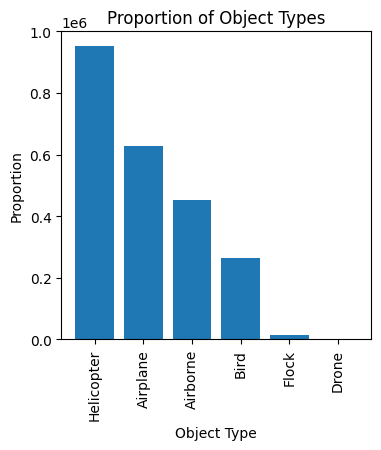

In [ ]:
plt.bar(object_types.index, object_types.values)
plt.rcParams['figure.figsize'] = [4, 4]
plt.xticks(rotation=90)
plt.title('Proportion of Object Types')
plt.xlabel('Object Type')
plt.ylabel('Proportion')
plt.show()

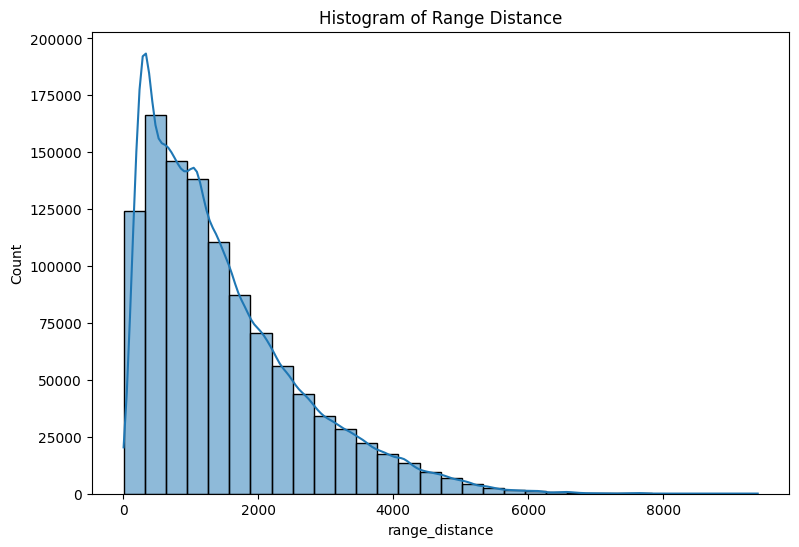

In [ ]:
# Histograms for 'range distance' and 'area'
plt.figure(figsize=(9, 6))  # Set the figure size
sns.histplot(df['range_distance'], bins=30, kde=True)
plt.title('Histogram of Range Distance')
plt.show()

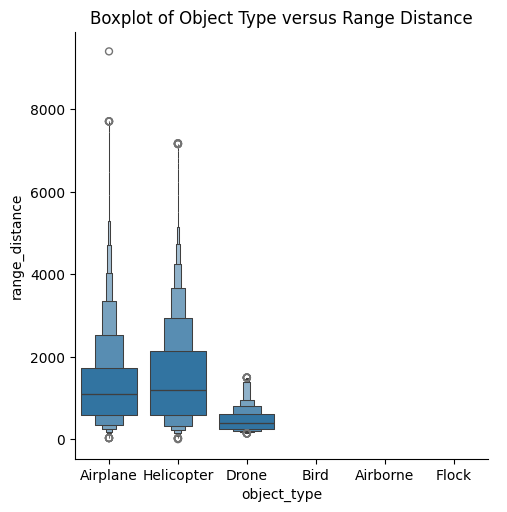

In [ ]:
sns.catplot(data=df, x='object_type', y="range_distance", kind="boxen")
plt.title('Boxplot of Object Type versus Range Distance')
plt.show()

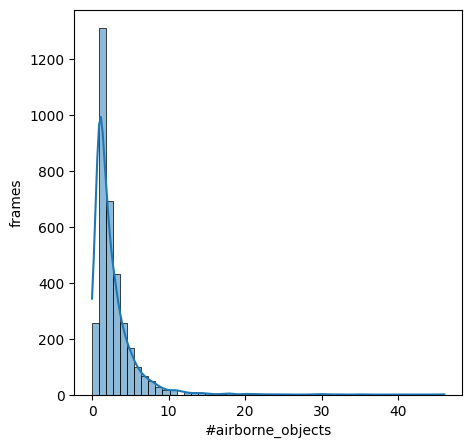

None

Avg:  2.5532286212914483
Min:  0
Max:  46


In [23]:
num_objects = []
for flight_id in dataset.get_flight_ids():
    num_objects.append(dataset.get_flight(flight_id).num_airborne_objs)

plt.figure(figsize=(5, 5))
sns.histplot(num_objects, kde=True, bins=50)
plt.ylabel('frames')
plt.xlabel('#airborne_objects')
display(plt.show())


print("Avg: ", sum(num_objects) / len(num_objects))
print("Min: ", min(num_objects))
print("Max: ", max(num_objects))

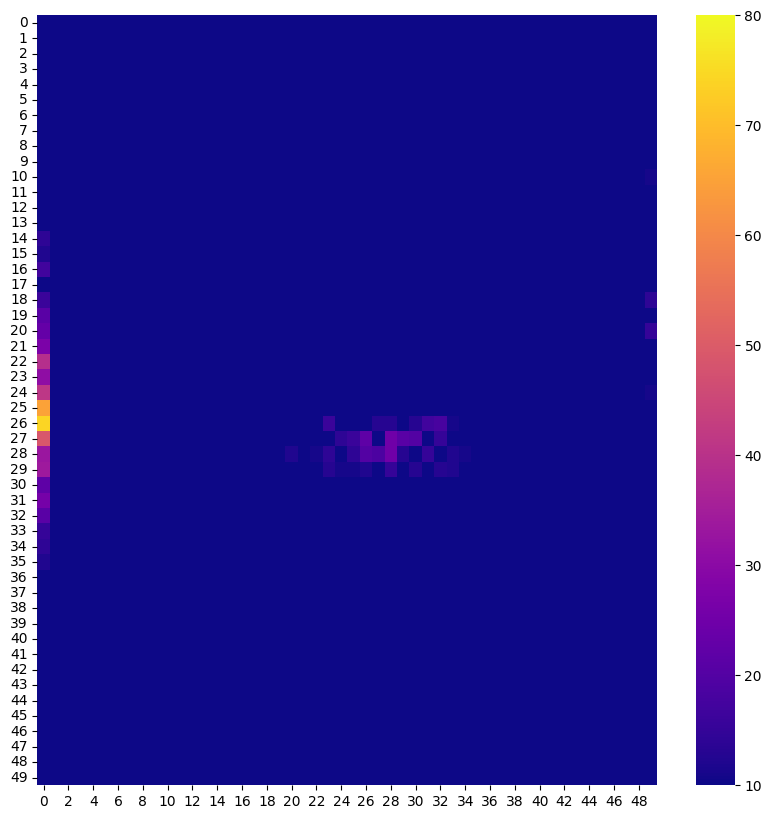

In [31]:
# Entry position in frame
# No variables for bottom or right but as the value gets larger
# it corresponds to being closer to right or bottom.
obj_center_left_entry = []
obj_center_top_entry = []

for flight_id in dataset.get_flight_ids():
    flight = dataset.get_flight(flight_id)
    for obj in flight.detected_objects:
        if flight.detected_objects[obj].planned:
            for loc in flight.detected_objects[obj].location:
                left, top = loc.bb.get_center()
                obj_center_left_entry.append(left)
                obj_center_top_entry.append(top)
                break

# Create a 2D histogram
heatmap, xedges, yedges = np.histogram2d(obj_center_left_entry, obj_center_top_entry, bins=50)

# setting the cells visible:
vmin = 10
vmax = 80
# Use sns.heatmap to plot the data
plt.figure(figsize=(10, 10))
sns.heatmap(heatmap.T, cmap="plasma", vmin=vmin, vmax=vmax, annot=False, cbar=True)
plt.show()